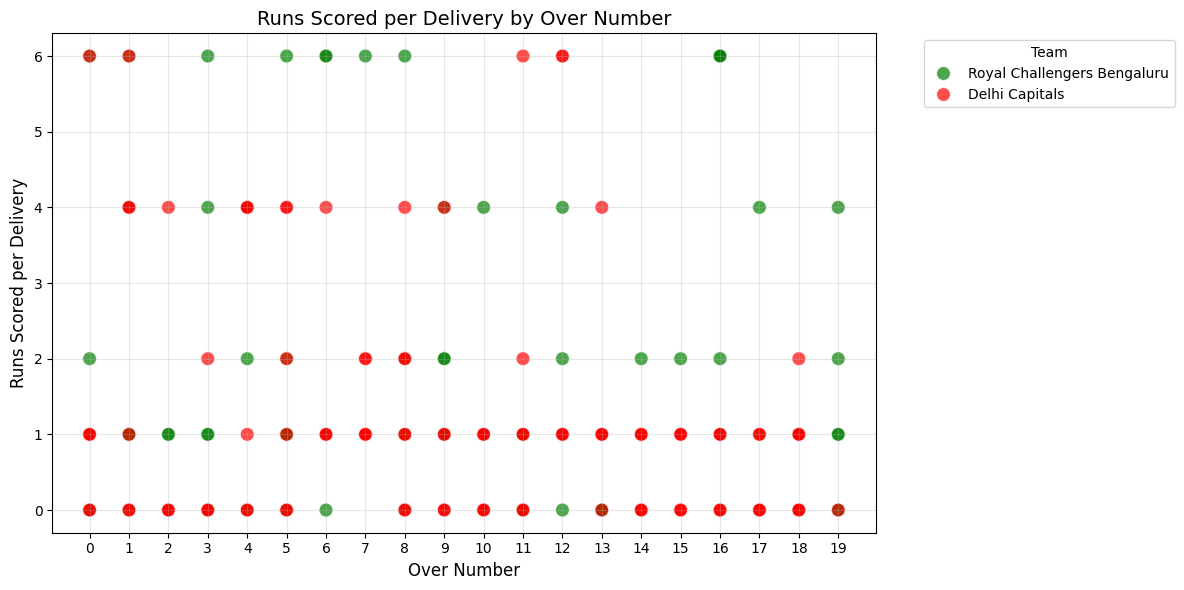

In [ ]:
#1.Scatter Plot of Runs per Delivery by Over for IPL Teams(Scatter Plot)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\innings_deliveries (1).csv")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='over', y='runs_total', hue='team', 
                palette={'Royal Challengers Bengaluru': 'green', 'Delhi Capitals': 'red'},
                alpha=0.7, s=100)

plt.title('Runs Scored per Delivery by Over Number', fontsize=14)
plt.xlabel('Over Number', fontsize=12)
plt.ylabel('Runs Scored per Delivery', fontsize=12)
plt.xticks(range(0, 20))
plt.grid(True, alpha=0.3)


plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

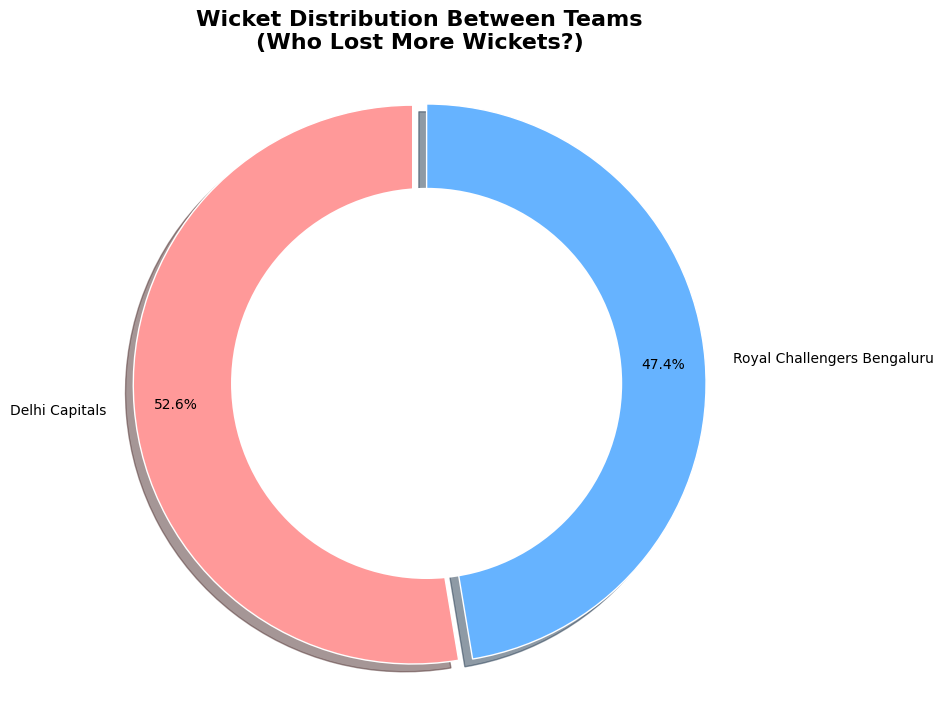

In [12]:
#2.Donut Chart Visualizing Team-wise Wicket Distribution in IPL Match(Pie Chart)
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\innings_deliveries (1).csv")

wicket_data = df[df['player_out'].notna()]['team'].value_counts()

colors = ['#ff9999','#66b3ff']
explode = (0.05, 0) 
plt.figure(figsize=(10, 8))
plt.pie(wicket_data, 
        labels=wicket_data.index, 
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode=explode,
        shadow=True,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Wicket Distribution Between Teams\n(Who Lost More Wickets?)', 
          fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  

boundary_data = df[df['runs_batter'].isin([4,6])].groupby('team')['batter'].count()
plt.show()

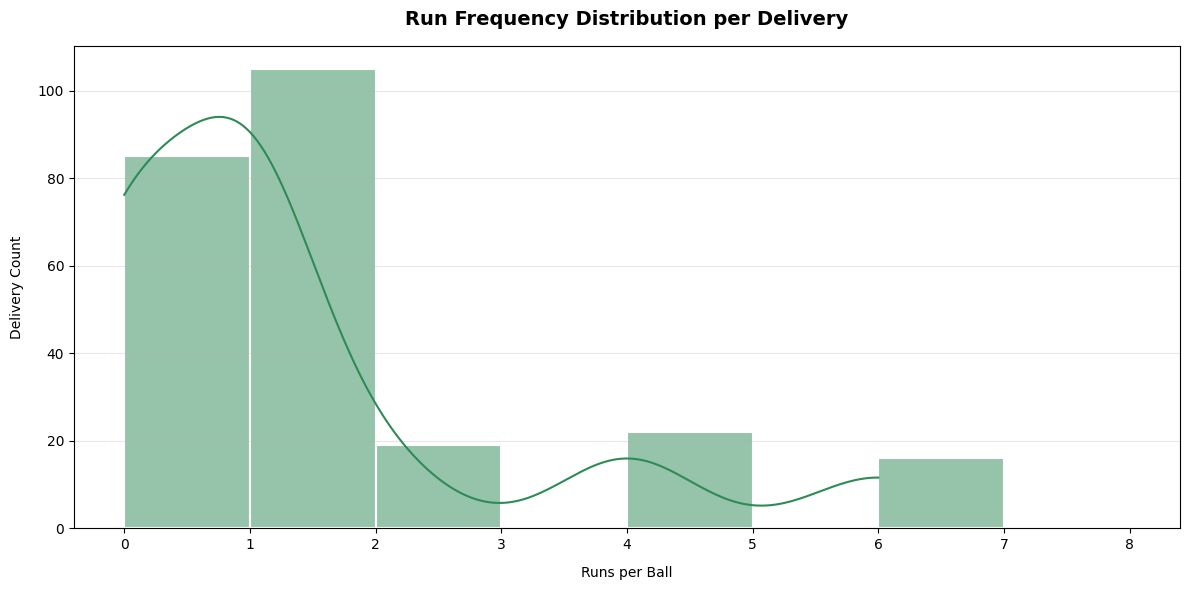

In [ ]:
#3.To visualize the distribution of runs scored per delivery and analyze scoring frequency patterns in the match.(Histogram)

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='runs_total', bins=range(0,9),
            color='#2E8B57', kde=True, edgecolor='white',
            linewidth=1.5)
plt.title("Run Frequency Distribution per Delivery", pad=15, fontsize=14, fontweight='bold')
plt.xlabel("Runs per Ball", labelpad=10)
plt.ylabel("Delivery Count", labelpad=10)
plt.xticks(range(0,9))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

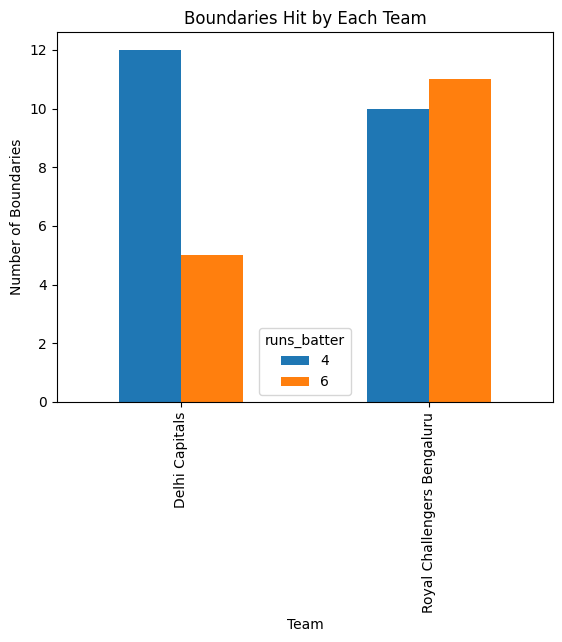

In [ ]:
#4.To visualize and compare the number of 4s and 6s hit by each team using a bar chart.
boundaries = df[df['runs_batter'].isin([4,6])]
boundary_counts = boundaries.groupby(['team', 'runs_batter']).size().unstack()
plt.figure(figsize=(8,5))
boundary_counts.plot(kind='bar')
plt.title('Boundaries Hit by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Boundaries')
plt.show()

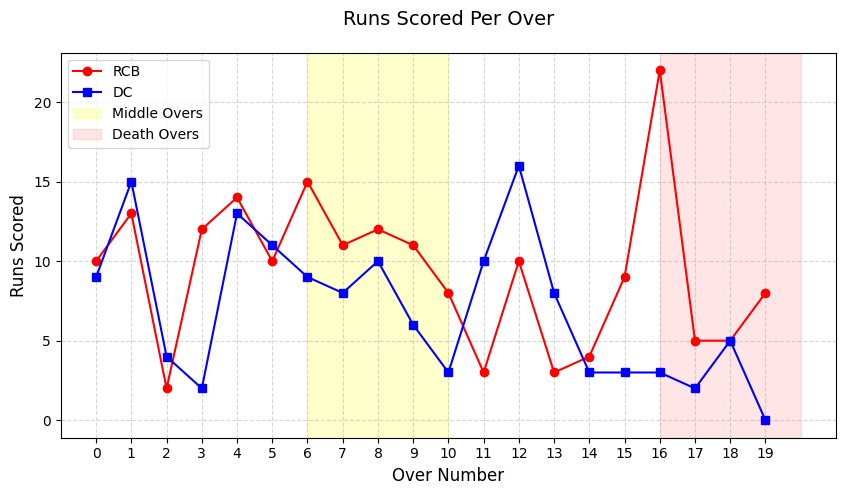

In [15]:
#5.The chart reveals which team dominated powerplays(Line Chart)
runs_per_over = df.groupby(['team', 'over'])['runs_total'].sum().unstack(level=0)
plt.figure(figsize=(10,5))
plt.plot(runs_per_over.index, runs_per_over['Royal Challengers Bengaluru'], 
         color='red', marker='o', label='RCB')
plt.plot(runs_per_over.index, runs_per_over['Delhi Capitals'], 
         color='blue', marker='s', label='DC')
plt.title('Runs Scored Per Over', fontsize=14, pad=20)
plt.xlabel('Over Number', fontsize=12)
plt.ylabel('Runs Scored', fontsize=12)
plt.xticks(range(0,20))
plt.axvspan(6, 10, color='yellow', alpha=0.2, label='Middle Overs')
plt.axvspan(16, 20, color='red', alpha=0.1, label='Death Overs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Figure size 1400x700 with 0 Axes>

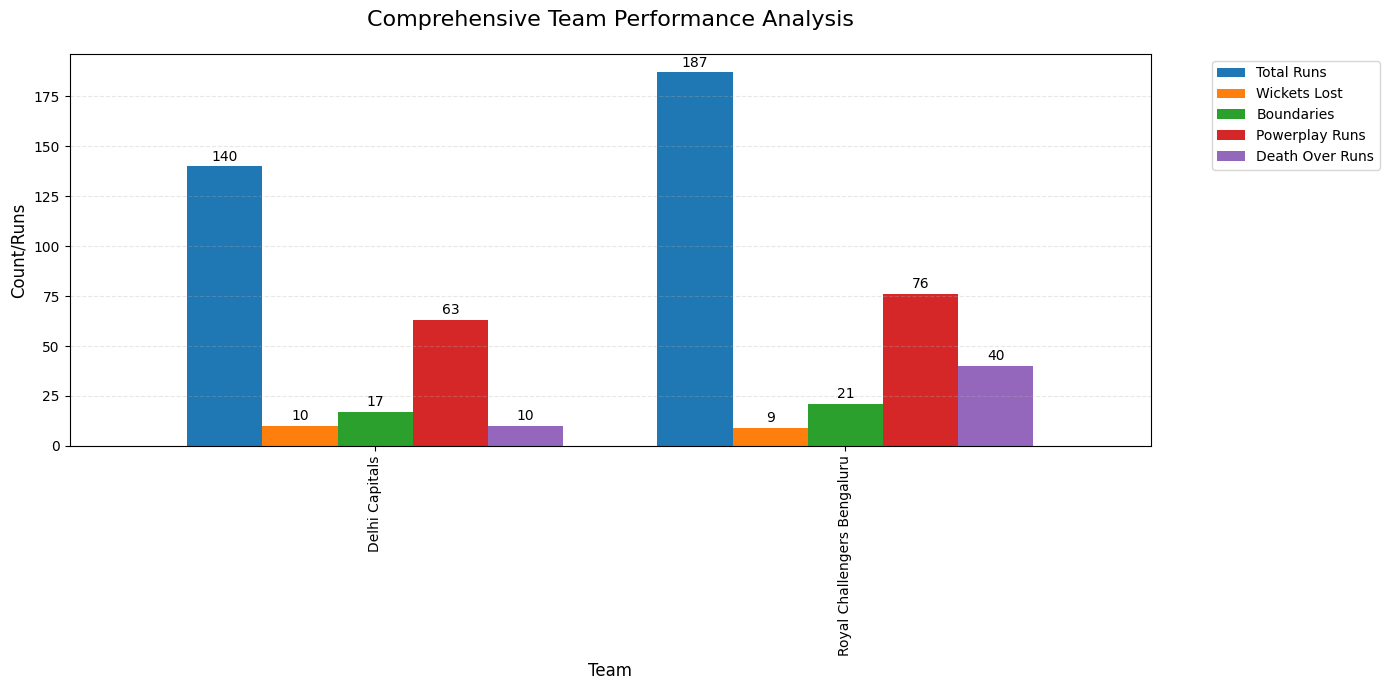

In [ ]:
#6. This chart reveals which team dominated in overall scoring, powerplays, death overs, and boundary hitting
team_stats = df.groupby('team').agg(
    total_runs=('runs_total', 'sum'),
    wickets_lost=('player_out', lambda x: x.notna().sum()),
    boundaries=('runs_batter', lambda x: x.isin([4,6]).sum()),
    powerplay_runs=('runs_total', lambda x: x[df['over'] <= 6].sum()),
    death_runs=('runs_total', lambda x: x[df['over'] >= 16].sum())
).reset_index()
plt.figure(figsize=(14, 7))
x = range(len(team_stats['team']))
width = 0.15
ax = team_stats.plot(
    x='team',
    y=['total_runs', 'wickets_lost', 'boundaries', 'powerplay_runs', 'death_runs'],
    kind='bar',
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
    figsize=(14,7)
)
plt.title('Comprehensive Team Performance Analysis', fontsize=16, pad=20)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Count/Runs', fontsize=12)
plt.legend(['Total Runs', 'Wickets Lost', 'Boundaries', 'Powerplay Runs', 'Death Over Runs'],
           bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, 
                label_type='edge', 
                padding=2, 
                fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

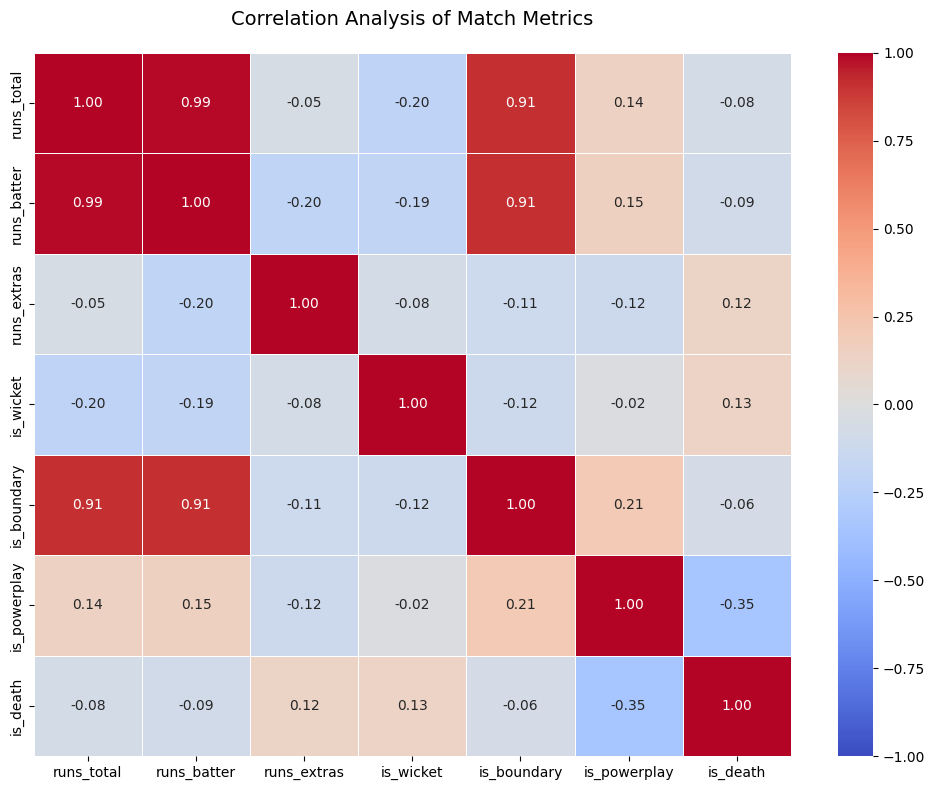

In [1]:
#7.To identify relationships between key match metrics (runs, wickets, boundaries, and match phases) through correlation analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\innings_deliveries (1).csv")
df['is_wicket'] = df['player_out'].notna().astype(int)
df['is_boundary'] = df['runs_batter'].isin([4,6]).astype(int)
df['is_powerplay'] = (df['over'] <= 6).astype(int)
df['is_death'] = (df['over'] >= 16).astype(int)
corr_cols = ['runs_total', 'runs_batter', 'runs_extras', 'is_wicket', 
             'is_boundary', 'is_powerplay', 'is_death']
corr_df = df[corr_cols]
corr_matrix = corr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            linewidths=0.5,
            fmt=".2f")
plt.title('Correlation Analysis of Match Metrics', fontsize=14, pad=20)
plt.tight_layout()
plt.show()